In [2]:
import pandas as pd
import requests
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
Dataframe=pd.read_csv(url)
Dataframe.head()

iso_code location        date  total_cases  new_cases  total_deaths  \
0      ABW    Aruba  2020-03-13            2          2             0   
1      ABW    Aruba  2020-03-20            4          2             0   
2      ABW    Aruba  2020-03-24           12          8             0   
3      ABW    Aruba  2020-03-25           17          5             0   
4      ABW    Aruba  2020-03-26           19          2             0   

   new_deaths  total_cases_per_million  new_cases_per_million  \
0           0                   18.733                 18.733   
1           0                   37.465                 18.733   
2           0                  112.395                 74.930   
3           0                  159.227                 46.831   
4           0                  177.959                 18.733   

   total_deaths_per_million  new_deaths_per_million  total_tests  new_tests  \
0                       0.0                     0.0          NaN        NaN   
1                       0.0                     0.0          NaN        NaN   
2                       0.0                     0.0          NaN        NaN   
3                       0.0                     0.0          NaN        NaN   
4                       0.0                     0.0          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand tests_units  
0                       NaN                     NaN         NaN  
1                       NaN                     NaN         NaN  
2                       NaN                     NaN         NaN  
3                       NaN                     NaN         NaN  
4                       NaN                     NaN         NaN

In [4]:
SubDF = Dataframe.drop(['new_cases','new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million', 'new_deaths_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units'], axis=1)
                 

In [5]:
Dataframe.describe()

total_cases     new_cases  total_deaths    new_deaths  \
count   12037.000000  12037.000000  12037.000000  12037.000000   
mean     3469.969843    195.659799    198.439811     13.678574   
std     24749.344898   1434.926480   1567.980651    112.298385   
min         0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000   
50%        16.000000      1.000000      0.000000      0.000000   
75%       276.000000     22.000000      4.000000      0.000000   
max    759687.000000  35527.000000  40682.000000   4928.000000   

       total_cases_per_million  new_cases_per_million  \
count             11853.000000           11853.000000   
mean                218.810109              11.779425   
std                 850.648024              69.302915   
min                   0.000000               0.000000   
25%                   0.000000               0.000000   
50%                   2.887000               0.042000   
75%                  65.770000               3.067000   
max               13583.594000            4944.376000   

       total_deaths_per_million  new_deaths_per_million   total_tests  \
count              11853.000000            11853.000000  2.557000e+03   
mean                   8.266100                0.527079  9.067679e+04   
std                   55.269093                3.823723  2.918332e+05   
min                    0.000000                0.000000  1.000000e+00   
25%                    0.000000                0.000000  2.350000e+03   
50%                    0.000000                0.000000  1.501800e+04   
75%                    0.493000                0.000000  5.954500e+04   
max                 1149.154000              176.793000  4.003551e+06   

          new_tests  total_tests_per_thousand  new_tests_per_thousand  
count    2248.00000               2557.000000             2257.000000  
mean     5963.59831                  4.730170                0.269574  
std     18125.30601                 11.009818                0.548164  
min         1.00000                  0.000000                0.000000  
25%       257.50000                  0.093000                0.013000  
50%      1184.00000                  0.760000                0.079000  
75%      4226.50000                  4.652000                0.329000  
max    229268.00000                125.578000                7.243000

In [6]:
SubDF.describe()

total_cases  total_deaths
count   12037.000000  12037.000000
mean     3469.969843    198.439811
std     24749.344898   1567.980651
min         0.000000      0.000000
25%         0.000000      0.000000
50%        16.000000      0.000000
75%       276.000000      4.000000
max    759687.000000  40682.000000

In [7]:
Struct_data_bydate = SubDF.groupby(SubDF.date).sum()
Struct_data_bycountries = SubDF.groupby(SubDF.location).count()
Struct_data_bydate

total_cases  total_deaths
date                                 
2019-12-31           27             0
2020-01-01           27             0
2020-01-02           27             0
2020-01-03           44             0
2020-01-04           44             0
...                 ...           ...
2020-04-16      2029234        136313
2020-04-17      2113573        144820
2020-04-18      2196897        153083
2020-04-19      2281018        159504
2020-04-20      2355157        164649

[112 rows x 2 columns]

In [8]:
Struct_data_bycountries.describe()

iso_code        date  total_cases  total_deaths
count  206.000000  206.000000   206.000000    206.000000
mean    58.432039   58.432039    58.432039     58.432039
std     35.612724   35.612724    35.612724     35.612724
min      4.000000    4.000000     4.000000      4.000000
25%     32.000000   32.000000    32.000000     32.000000
50%     39.000000   39.000000    39.000000     39.000000
75%    106.000000  106.000000   106.000000    106.000000
max    112.000000  112.000000   112.000000    112.000000

In [9]:
Struct_data_bydate.describe()

total_cases   total_deaths
count  1.120000e+02     112.000000
mean   3.729288e+05   21326.964286
std    6.250516e+05   40746.836799
min    2.700000e+01       0.000000
25%    4.145250e+03      99.750000
50%    7.904450e+04    2655.500000
75%    3.474605e+05   15036.000000
max    2.355157e+06  164649.000000

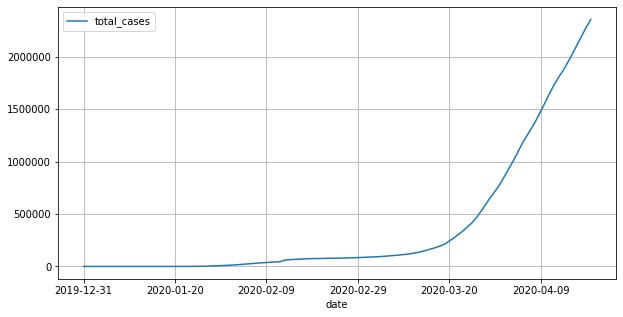

In [10]:
Struct_data_bydate.plot(y='total_cases')
plt.grid()

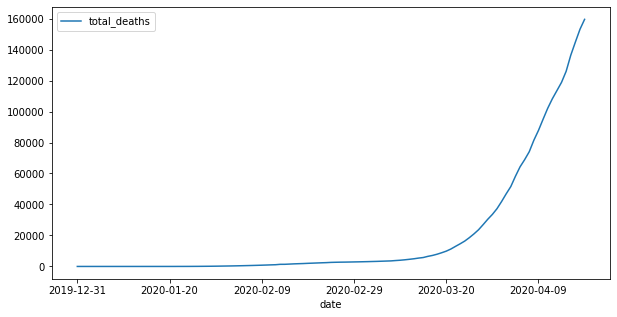

In [121]:
Struct_data_bydate.plot(y='total_deaths')

In [122]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

In [152]:
def predict_model(x, y):   
    x_pred = np.arange(len(y)+20).reshape(-1, 1)
    
    #création de notre formul polynomial de 3 eme degrès , 
    #l'argument include_bias celon son activation permet de prendre en compte ou non le coeficient du x e puissance 0
    Regpolynome = PolynomialFeatures(degree=3, include_bias=False)
    
    #Calcule des coeficients de notre polynome
    x_ = Regpolynome.fit_transform(x.reshape(-1, 1))

    #Entrainement du modèle
    model = LinearRegression().fit(x_, y)

    #Calcul du coefficient de détermination (le R2) ou le score
    R2 = model.score(x_, y)
    print('coefficient of determination :', R2)
    
    # Affiche les coefficients du modèle (A*X^3+B*X^2+C*X+D)
    print('coefficients : ', model.coef_)
    
    #calcule de la prédiction 
    y_pred = model.predict(x_)

    #Transforme les données x pour la prévision: 30 j à partir du 18/03
    Regpolynome.fit(x_pred)
    xx_ = Regpolynome.transform(x_pred)

    #Calcule les prédictions pour la France
    y_pred = model.predict(xx_)
    return y_pred, R2


In [153]:
#graphique
#def graphique(x, y, prediction):
    
    #data = {'index':  x,
            #'x_pred': np.arange(len(prediction)),
            #'y' : y,
            #'prediction': prediction
            #}
    #df = pd.DataFrame.from_dict(data, orient='index').T
    #fig = px.scatter(df, x='index', y='y')
    # Only thing I figured is - I could do this 
    #fig.add_scatter(x=df['x_pred'], y=df['prediction'])
    # Show plot 
    #fig.show()
    
def graphique(x, y, prediction, titre):
    x_pred = np.arange(len(prediction))
    f = plt.figure()
    plt.plot(x, y, color='b', label= titre + ' covid-19 virus data')
    plt.scatter(x_pred, prediction, color='r',s=10, marker='v', label=  titre + ' covid-19 virus prediction')
    plt.rcParams["figure.figsize"] = [10, 5]
    plt.title(titre +' prediction COVID-19 on the world (Predictif Model : polynomial regression with 3degres)' )
    plt.xlabel('Dath since december 2020')
    plt.ylabel(titre)
    leg = plt.legend();
    plt.grid()
    plt.show()


In [154]:
def data(Y) : 
    Y = Y.to_numpy()
    X = np.arange(len(Y))
    return X, Y


In [155]:
x, y = data(Struct_data_bydate.total_deaths)
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

In [156]:
prediction, scor = predict_model(x, y)
print('pred=',prediction.shape, 'x=',x.shape,'y=',y.shape)

coefficient of determination : 0.9766396018036951
coefficients :  [ 1.96068830e+03 -6.21871951e+01  5.25074862e-01]
pred= (131,) x= (111,) y= (111,)


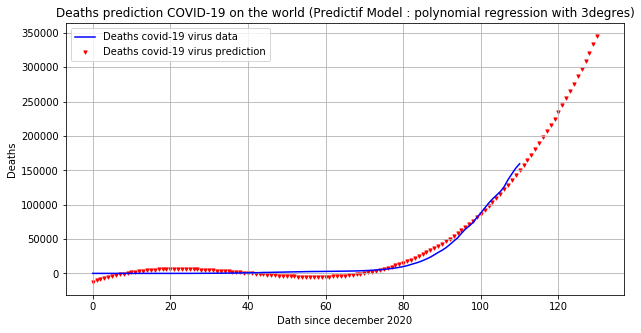

In [157]:
graphique(x, y, prediction, 'Deaths')

In [158]:
x1, y1 = data(Struct_data_bydate.total_cases)
prediction1, scor = predict_model(x1, y1)
print('pred=',prediction1.shape, 'x=',x1.shape,'y=',y1.shape)

coefficient of determination : 0.9863800365219861
coefficients :  [ 2.35293957e+04 -7.62421466e+02  6.82540612e+00]
pred= (131,) x= (111,) y= (111,)


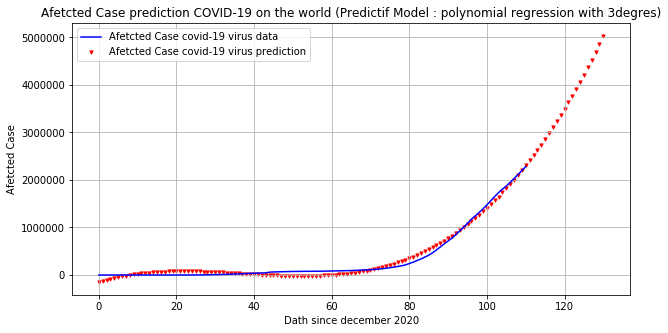

In [159]:
graphique(x1, y1, prediction1,'Afetcted Case')